# 01 - Exploration
Objective: load dataset, inspect missing values, distributions, and correlations.


In [9]:
import os, sys
sys.path.append(os.path.abspath("..")) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.preprocessing import summarize_missing

sns.set(style="whitegrid")


In [10]:
local_path = "../data/raw/heart.csv"
df = pd.read_csv(local_path)
print("Shape:", df.shape)
df.head()


Shape: (30, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,2,120,236,0,0,178,0,0.8,2,0,2,1
4,57,0,2,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       30 non-null     int64  
 1   sex       30 non-null     int64  
 2   cp        30 non-null     int64  
 3   trestbps  30 non-null     int64  
 4   chol      30 non-null     int64  
 5   fbs       30 non-null     int64  
 6   restecg   30 non-null     int64  
 7   thalach   30 non-null     int64  
 8   exang     30 non-null     int64  
 9   oldpeak   30 non-null     float64
 10  slope     30 non-null     int64  
 11  ca        30 non-null     int64  
 12  thal      30 non-null     int64  
 13  target    30 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 3.4 KB


In [12]:
summ = summarize_missing(df)
display(summ)


,missing,pct_missing
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


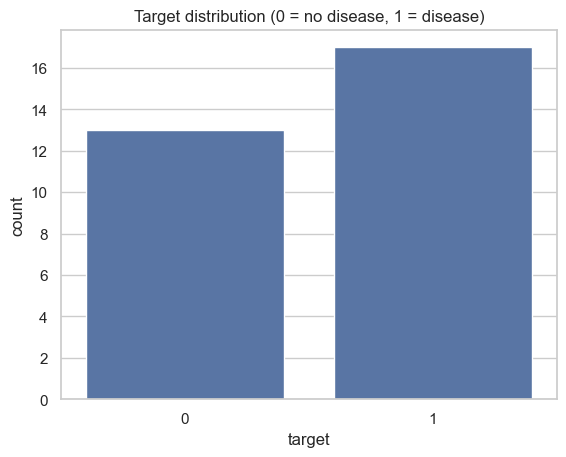

In [6]:
if 'target' in df.columns:
    sns.countplot(x='target', data=df)
    plt.title("Target distribution (0 = no disease, 1 = disease)")
    plt.show()
else:
    print("No 'target' column found.")


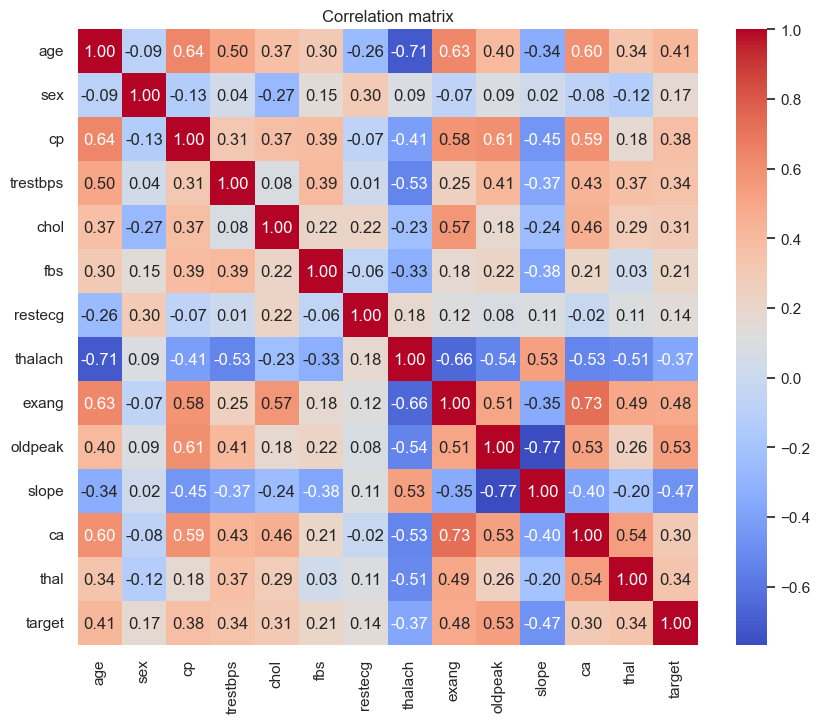

In [7]:
num_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()
